In [1]:
import os
from PIL import Image, ImageSequence, TiffImagePlugin

import numpy as np
import matplotlib.pyplot as plt

In [73]:
from PIL import Image
import numpy as np
import glob
meanDisp = []
standardDev = []
microsperpixel = 635/260
fps = 6.15
def read_tiff(path):
    """
    path - Path to the multipage-tiff file
    """
    img = Image.open(path)
    images = []
    for i in range(img.n_frames):
        img.seek(i)
        images.append(np.array(img))
    return np.array(images)
alpha = [0, 0.1, .25, .5, .75, 1, 1.5, 2]
for i in range(2,10):  # Starting run number
    # Format strings with curly braces and format method to insert 'i'
    data1 = read_tiff(r'C:\Users\raklab\Pictures\Feedback_Data\20240708\run{}.tif'.format(i))
    data2 = read_tiff(r'C:\Users\raklab\Pictures\Feedback_Data\20240708\run{}_1.tif'.format(i))
    data = np.concatenate((data1, data2), axis=0)
    print("Done run ",i)
    waterfall = np.min(data, axis=2)
    waterfall[waterfall>80] = 80 # thresholding
    waterfall = waterfall[:,475:]
    waterfallFT1 = np.fft.fft(waterfall[0,:]) 
    waterfallFT = np.fft.fft(waterfall, axis=1)

    cc = np.fft.fftshift(np.abs(np.fft.ifft(waterfallFT1 * np.conj(waterfallFT))))

    cc = cc - np.mean(cc)

    displacement = np.argmax(cc, axis=1)*microsperpixel
    t = np.arange(maxind.shape[0])/fps
    
    # Create a histogram with specified bins
    hist, bins = np.histogram(displacement, np.linspace(200,900,100), density=True) 
    # Calculate the bin centers (for plotting purposes)
    bin_centers = (bins[:-1] + bins[1:]) / 2
    #plt.xlabel('Displacement')
    #plt.ylabel('Frequency')
    #plt.hist(displacement, bins=bins, alpha=0.25, label=f'i={i}', stacked=True, density=True)
    standardDev.append(np.std(displacement))
    meanDisp.append(np.mean(displacement))


Done run  2
Done run  3
Done run  4
Done run  5
Done run  6
Done run  7
Done run  8
Done run  9


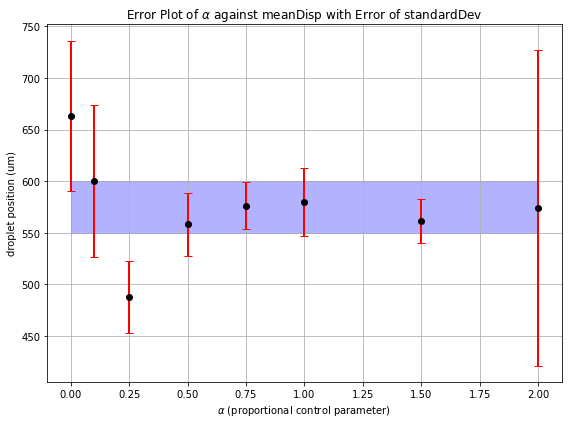

In [75]:
# Plot setup
plt.figure(figsize=(8, 6))

# Error bars for standard deviation
plt.errorbar(alpha, meanDisp, yerr=standardDev, fmt='o', color='black', ecolor='red', elinewidth=2, capsize=4)

rect = plt.Rectangle((0, np.median(meanDisp)-25), 2, 50, alpha=0.3, color='blue')
plt.gca().add_patch(rect)

# Labels and title
plt.xlabel(r'$\alpha$ (proportional control parameter)')
plt.ylabel('droplet position (um)')
plt.title('Error Plot of $\\alpha$ against meanDisp with Error of standardDev')

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()

In [22]:
waterfall.shape

(1000, 473)

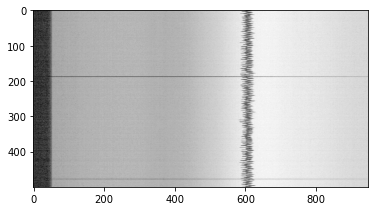

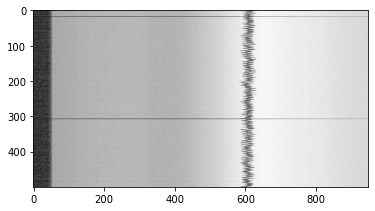

In [66]:
for i in range(1,3):  # Starting run number
    # Format strings with curly braces and format method to insert 'i'
    data = read_tiff(r'C:\Users\raklab\Pictures\Feedback_Data\20240708\gamma{}.tif'.format(i))
    plt.imshow(np.min(data, axis=2), cmap = 'gray')
    plt.show()
    


In [17]:
import cv2

# Path to your AVI file
avi_file = '/c/Users/raklab/Pictures/Feedback_Data/20240708/run1.avi'

# Open the video file
cap = cv2.VideoCapture(avi_file)

# Check if the video opened successfully
if not cap.isOpened():
    print("Error opening video file")
    exit()

# Read and display frames until the video ends
while True:
    # Capture frame-by-frame
    ret, frame = cap.read()

    # If frame is read correctly ret is True
    if not ret:
        break

    

Note: you may need to restart the kernel to use updated packages.


In [18]:
# Corrected filename pattern
filename_pattern = r'C:\Users\raklab\Pictures\Feedback_Data\20240708\run2*.tif'

# Using glob to retrieve the list of filenames
filenames = sorted(glob.glob(filename_pattern))
data = [read_tiff(f) for f in filenames]

Note: you may need to restart the kernel to use updated packages.


PermissionError: [Errno 13] Permission denied: 'C:\\Users\\raklab\\Pictures\\Feedback_Data\\20240708'

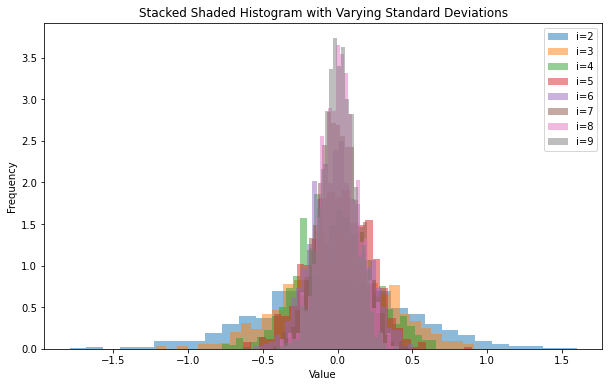

In [69]:
import matplotlib.pyplot as plt
import numpy as np

# Initialize the figure
plt.figure(figsize=(10, 6))

# Loop from i = 2 to i = 9
for i in range(2, 10):
    # Generate random data with standard deviation 1/i
    data = np.random.normal(loc=0, scale=1/i, size=1000)
    
    # Plot the histogram with shading, stacked on top
    plt.hist(data, bins=30, alpha=0.5, label=f'i={i}', stacked=True, density=True)

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Stacked Shaded Histogram with Varying Standard Deviations')
plt.legend()

# Show plot
plt.show()
